In [1]:
# !for i in `find . -name ".DS_Store"`; do rm -rf $i; done
%matplotlib inline
import numpy as np
import os
import pandas as pd
import random
from matplotlib import pyplot as plt
from PIL import Image
from scipy.stats import gaussian_kde
from xml.etree import ElementTree as ET

In [2]:
txt_path = "data/classes.txt"
xmls_path = "VOC/Annotations"
images_path = "VOC/JPEGImages"
with open(txt_path, encoding="utf-8") as f:
    classes = f.readlines()
classes = [c.strip() for c in classes]
nums = np.zeros(len(classes), dtype="int32")
xs, ys = [], []
for xml_name in os.listdir(xmls_path):
    in_file = open("%s/%s" % (xmls_path, xml_name), encoding="utf-8")
    tree = ET.parse(in_file)
    root = tree.getroot()
    for obj in root.iter("object"):
        difficult = 0
        if obj.find("difficult") is not None:
            difficult = obj.find("difficult").text
        cls = obj.find("name").text
        if cls not in classes or int(difficult) == 1:
            continue
        xmlbox = obj.find("bndbox")
        xs.append(float(xmlbox.find("xmax").text) - float(xmlbox.find("xmin").text))
        ys.append(float(xmlbox.find("ymax").text) - float(xmlbox.find("ymin").text))
        nums[classes.index(cls)] = nums[classes.index(cls)] + 1
pd.DataFrame(nums, index=classes, columns=["number of images"])

,number of images
Apple Scab Leaf,171
Apple leaf,247
Apple rust leaf,178
Bell_pepper leaf,323
Bell_pepper leaf spot,263
Blueberry leaf,838
Cherry leaf,239
Corn Gray leaf spot,76
Corn leaf blight,368
Corn rust leaf,127


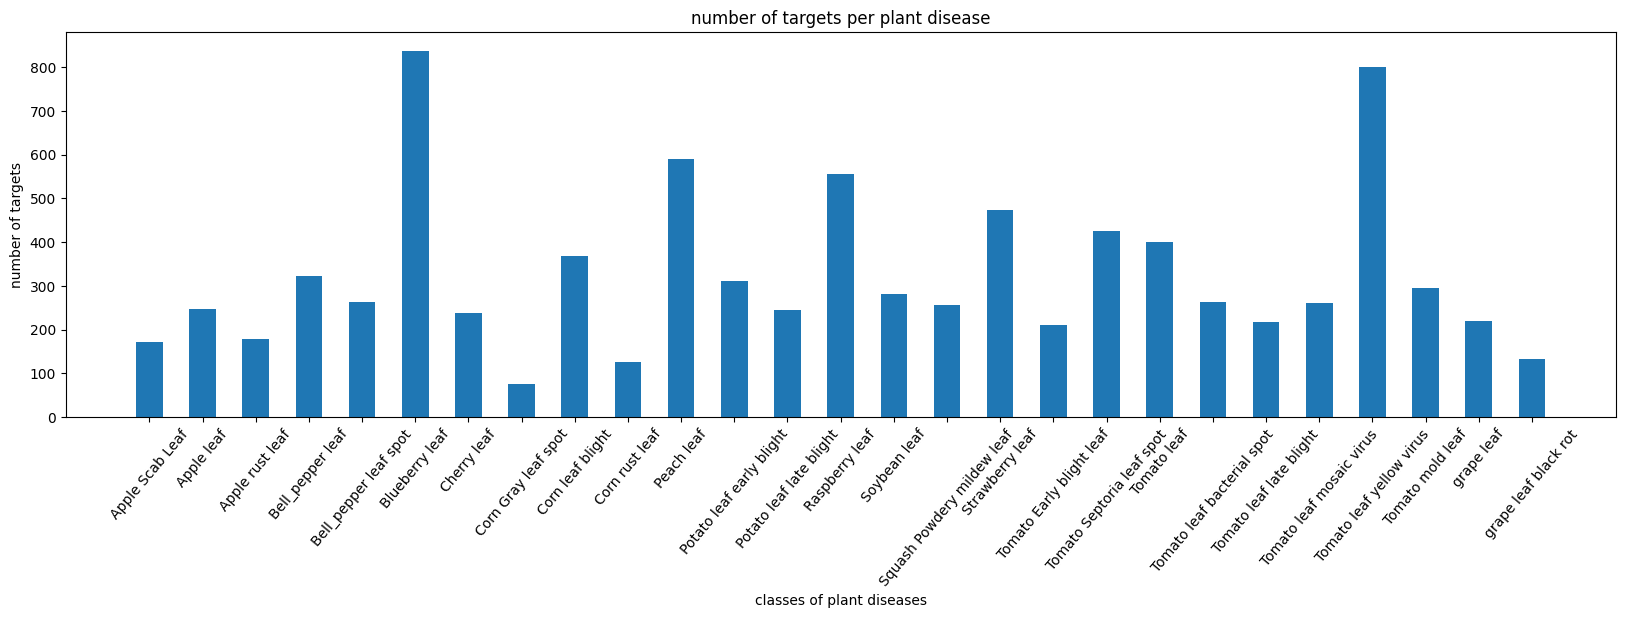

In [3]:
indices = [i for i in range(len(classes))]
plt.figure(figsize=(20, 5))
plt.bar(indices, nums, width=0.5)
plt.title("number of targets per plant disease")
plt.xticks(indices, classes, fontsize=10, rotation=50)
plt.tick_params(labelsize=10)
plt.xlabel("classes of plant diseases", fontsize=10)
plt.ylabel("number of targets", fontsize=10)
plt.show();

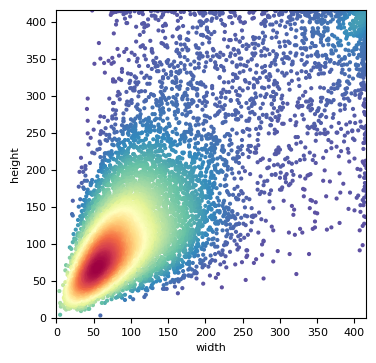

In [4]:
x = np.array(xs, dtype=float)
y = np.array(ys, dtype=float)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.figure(figsize=(4, 4))
plt.scatter(x, y, c=z, s=4, cmap="Spectral_r")
plt.tick_params(labelsize=8)
xy_max = max(max(xs), max(ys))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)
plt.ylabel("height", fontsize=8)
plt.xlabel("width", fontsize=8)
plt.show();

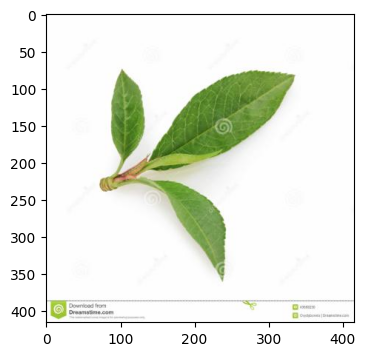

In [5]:
images = os.listdir(images_path)
random.shuffle(images)
plt.rcParams["figure.figsize"] = (4, 4)
image_path = os.path.join(images_path, images[0])
image = Image.open(image_path)
plt.imshow(image);